In [1]:
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt
from sympy.physics.quantum import Ket

In [13]:
MAX_N = 500
L = 1
xmin = 0
xmax = 1
domain = np.linspace(xmin, xmax, 1000)

In [14]:
def y0(x):
    return .5 * (1.7*(x/L)**2 - 0.7*(x/L) - (x/L)**3) * np.log(1 + (x/L))

def dot(x, n):
    return (np.sqrt(2/L) * np.sin(n*np.pi*x/L)) * y0(x)

def y(N, A, t=0):
    total = np.zeros_like(domain)
    for n in range(N):
        total += A[n] * np.sqrt(2/L) * np.sin((n+1)*np.pi*domain/L)
    return total

In [15]:
an = [integrate.quad(dot, 0, 1, args=(i,))[0] for i in range(1, MAX_N+1)]

C:\Users\austi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """Entry point for launching an IPython kernel.
C:\Users\austi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  """Entry point for launching an IPython kernel.


In [16]:
# an

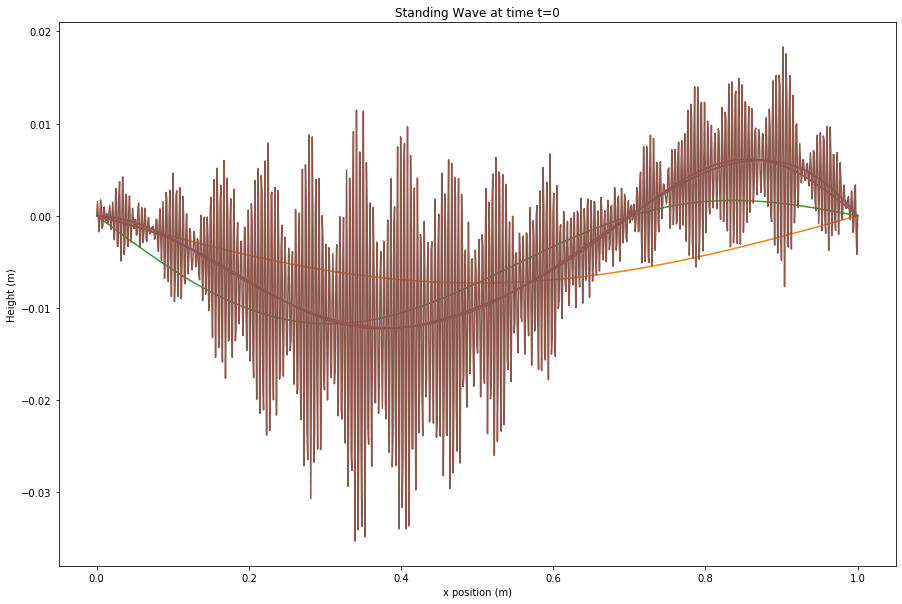

In [17]:
plt.figure(figsize=(15,10))
plt.plot(domain, y0(domain), label="y(x, 0)")
for i in [1, 2, 5, 15, MAX_N]:
    plt.plot(domain, y(i, an), label=f"n$\leq${i}")
# plt.legend()
plt.title("Standing Wave at time t=0")
plt.xlabel("x position (m)"); plt.ylabel("Height (m)")
plt.show()